# ZADANIE 1

### Wykonaj w Pythonie poniższy skrypt i przeanalizuj go

## Imports

In [174]:
from dataclasses import dataclass, field
from typing import *
import pylab as pl
import numpy as np
import math

# Constants

In [175]:
Tau = 2 * np.pi

# Definitions

In [176]:
SignalFn = Callable[[float], float]

@dataclass
class Signal(object):
  frequency: float
  amplitude: float
  fn: SignalFn

  @property
  def period(self):
    return 1 / self.frequency

  def probe(self, time: float) -> float:
    return self.amplitude * self.fn(Tau * self.frequency * time)

@dataclass
class SignalAnalysis(object):
  time: np.ndarray
  values: np.ndarray
  fourier: np.ndarray

  @property
  def fourier_module(self) -> np.ndarray:
    return np.abs(self.fourier)
  @property
  def probe_len(self):
    return len(self.values)

@dataclass
class SignalAnalyzer(object):
  signal: Signal

  def _probe_time(self, periods: float, step: float) -> np.ndarray:
    return np.arange(0, periods * self.signal.period + step, step)

  def _probe_value(self, time: float) -> np.ndarray:
    return self.signal.probe(time)

  def analyze(self, periods: float, frequency: float):
    time = self._probe_time(periods, frequency)
    values = self._probe_value(time)
    transform = abs(np.fft.fft(values))
    return SignalAnalysis(time, values, transform)


# Signal

In [177]:
signal = Signal(frequency=2.0, amplitude=1, fn=np.sin)
analyser = SignalAnalyzer(signal)

# Presentation

In [225]:
@dataclass()
class SignalPlotter(object):
  figure: pl.plt.Figure = pl.plt.figure(figsize=(12, 4), dpi=80)
  _real: Optional[pl.plt.Axes] = None
  _transform: Optional[pl.plt.Axes] = None

  def real(self, analysis: SignalAnalysis):
    (time, signal) = (analysis.time, analysis.values)

    self._real = self.figure.add_subplot(121)
    self._real.plot(time, signal, linestyle='-', color='red')
    self._real.set_ylim([1.1 * min(signal), 1.1 * max(signal)])

  def sample(self, analysis: SignalAnalysis):
    (time, signal) = (analysis.time, analysis.values)

    self._real.plot(time, signal, 'o')

  def transform(self, analysis: SignalAnalysis):
    (probe_len, module) = (analysis.probe_len, analysis.fourier_module)

    self._transform = self.figure.add_subplot(122)
    self._transform.set_ylim([-0.1 * max(module), 1.1 * max(module)])
    self._transform.stem(range(probe_len), module, '-*', use_line_collection=True)

  @classmethod
  def default(cls, real: SignalAnalysis, probe: SignalAnalysis, transform: SignalAnalysis = None):
    transform = transform or probe
    self = cls()
    self.real(real)
    self.sample(probe)
    self.transform(transform)
    return self.figure

<Figure size 960x320 with 0 Axes>

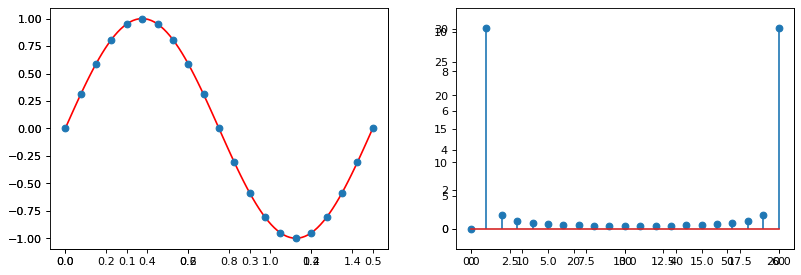

In [223]:
real = analyser.analyze(periods=1, frequency=1 / 200)
probe = analyser.analyze(periods=1, frequency=1 / 40)
SignalPlotter.default(real, probe)

### b) Zmień częstotliwość próbkowania na 50Hz.

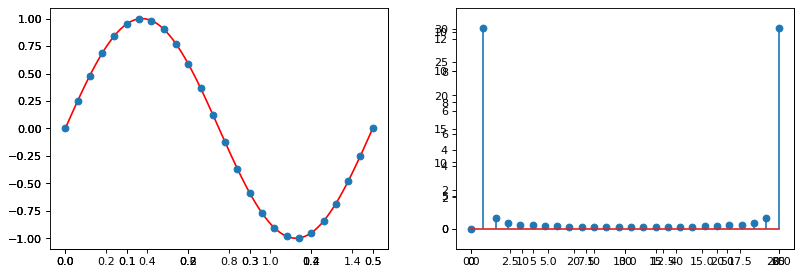

In [224]:
real = analyser.analyze(periods=1, frequency=1 / 200)
probe = analyser.analyze(periods=1, frequency=1 / 50)
SignalPlotter.default(real, probe)

### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [181]:
# popraw oś OX

### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [182]:
# Podpisz osie wykresów

### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

In [183]:
# F=5, w=20, LP=20

In [184]:
# F=21, w=20, LP=20

### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

In [185]:
# F=1, A=1, LP=1

In [186]:
# F=1, A=2, LP=1

In [187]:
# F=1, A=3, LP=1

### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

In [188]:
# F=1, w=50, LP=1

In [189]:
# F=1, w=100, LP=1

### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [190]:
# popraw oś OY

# Zadanie 2

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

a) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(F*2\pi t)$, $F=10Hz$

In [191]:
# f=10, w=100, A=1, LP=10

ii) $sin(F*2\pi t)$, $F=20Hz$

In [192]:
# f=20, w=100, A=1, LP=10

iii) $sin(2*pi*t*f)$, $f=30Hz$

In [193]:
# f=30, w=100, A=1, LP=10

iv) $sin(2*pi*t*f)$, $f=40Hz$

In [194]:
# f=40, w=100, A=1, LP=10

### b) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

### c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

In [195]:
# f=50, w=100, A=1, LP=10

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Jeżeli stworzyłeś/aś na początku funkcję odpowiedzialną za rysowanie sygnału i FFT, możesz ją zmodyfikować tak, by jako jej argument podawać funkcję lambda, realizującą sygnał.

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

In [196]:
# Wyrysuj sygnał

### c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.1, 0.3], częstotliwosci: [2.0, 4.0] oraz modyfikacje fazy[0 + math.pi]. Jeżli utworzyłeś/aś funkcje lambda wcześniej, śmiało możesz ją podmienić na 'zwyczajną funkcję', która będzie realizować sumowanie losowych sinusów. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*2*pi*t))? (Jeżeli wykorzystujesz podany na początku kod, to nie przejmuj się, że pełen sygnał i sprókowany sobie nie odpowiadają. Każdy jest inny - bo losowy). 

In [197]:
# Dodaj szum do sygnału

### d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz, LP=10. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [198]:
# Wyrysuj sygnał

### e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal).

In [199]:
#  faza = 0

In [200]:
# faza = pi/4

# Zadanie 4

### Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona? Uwaga: operacje fft() oraz ifft() działają na liczbach zmiennoprzecinkowych, zatem mają ograniczoną precyzję. To jest jedna z przyczyn tego, że te dwie operacje nie muszą być względem siebie odwrotne dla każdego argumentu. Skonstruuj odpowiedni test sprawdzający, czy fft() oraz ifft() rzeczywiście działają (prawie) odwrotnie. Taki test ma zwracać prawdę wtedy i tylko wtedy, kiedy x oraz ifft(fft(x)) są (prawie) identyczne. Możesz też sprawdzić, czy odpowiednie drobne przekształcenie danych wejściowych (x) spowoduje, że fft() i ifft() będą faktycznie idealnie odwrotne pomimo ograniczonej precyzji liczb zmiennoprzecinkowych.

In [201]:
# wygeneruj wektor x

In [202]:
# oblicz fft z x

In [203]:
# oblicz ifft z powyższego